In [1]:
import qiskit

In [2]:
qiskit.__qiskit_version__

{'qiskit-terra': '0.21.2', 'qiskit-aer': '0.11.0', 'qiskit-ignis': None, 'qiskit-ibmq-provider': '0.19.2', 'qiskit': '0.38.0', 'qiskit-nature': None, 'qiskit-finance': None, 'qiskit-optimization': None, 'qiskit-machine-learning': None}

In [3]:
from qiskit import IBMQ

In [4]:
IBMQ.save_account('b2a1cc46b815eadadc4d367b30e6863e769ad19fd25635dd5d95d35009153be0823d72768e8924cc4236c922fef977da1bddab46fb1fe21e5def7c3215abfcb3')

configrc.store_credentials:WARNING:2022-09-30 14:03:50,906: Credentials already present. Set overwrite=True to overwrite.


In [5]:
IBMQ.load_account()

<AccountProvider for IBMQ(hub='ibm-q', group='open', project='main')>

In [6]:
from qiskit import *

In [7]:
qr = QuantumRegister(2)
cr = ClassicalRegister(2)

circuit = QuantumCircuit(qr, cr)

In [8]:
%matplotlib inline
circuit.draw()

q0_0: 
      
q0_1: 
      
c0: 2/

In [9]:
circuit.h(qr[0])

In [10]:
circuit.draw()

┌───┐
q0_0: ┤ H ├
      └───┘
q0_1: ─────
           
c0: 2/═════

In [11]:
circuit.cx(qr[0], qr[1])

In [12]:
circuit.draw(output = 'text')

┌───┐     
q0_0: ┤ H ├──■──
      └───┘┌─┴─┐
q0_1: ─────┤ X ├
           └───┘
c0: 2/══════════

In [13]:
circuit.measure(qr, cr)

In [14]:
circuit.draw(output = 'text')

┌───┐     ┌─┐   
q0_0: ┤ H ├──■──┤M├───
      └───┘┌─┴─┐└╥┘┌─┐
q0_1: ─────┤ X ├─╫─┤M├
           └───┘ ║ └╥┘
c0: 2/═══════════╩══╩═
                 0  1

In [15]:
simulator = Aer.get_backend('qasm_simulator')

In [17]:
result = execute(circuit, backend = simulator).result()

In [18]:
from qiskit.tools.visualization import plot_histogram

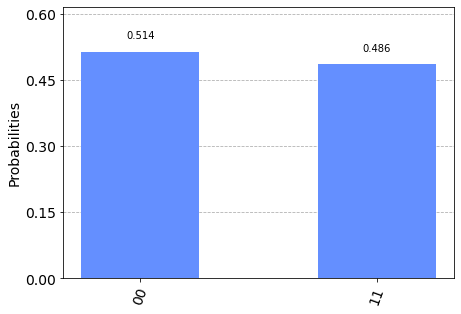

In [19]:
plot_histogram(result.get_counts(circuit))

In [20]:
provider = IBMQ.get_provider('ibm-q')

In [30]:
provider.backends()

[<IBMQSimulator('ibmq_qasm_simulator') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_lima') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_belem') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_quito') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQSimulator('simulator_statevector') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQSimulator('simulator_mps') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQSimulator('simulator_extended_stabilizer') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQSimulator('simulator_stabilizer') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_manila') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibm_nairobi') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibm_oslo') from IBMQ(hub='ibm-q', group='open', project='main')>]

In [31]:
qcomp = provider.get_backend('ibmq_manila')

In [32]:
job = execute(circuit, backend=qcomp)

In [38]:
from qiskit.tools.monitor import job_monitor

In [43]:
job_monitor(job)

Job Status: job has successfully run


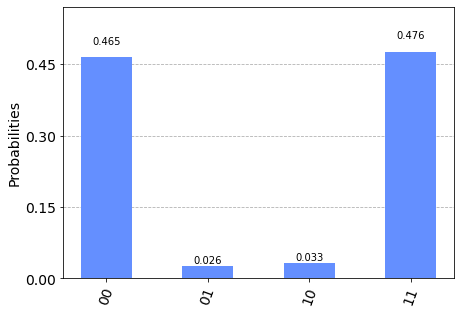

In [45]:
result=job.result()
plot_histogram(result.get_counts(circuit))